In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Constants
n_months = 24  # Number of months of data
start_date = '2018-01-01'

# Generate date range
date_range = pd.date_range(start=start_date, periods=n_months, freq='M')

# Create a seasonal pattern for rainfall and temperature
def generate_seasonal_rainfall(month):
    if month in [1, 2, 3]:  # Jan, Feb, Mar (Dry Season)
        return np.random.normal(loc=50, scale=10)
    elif month in [4, 5, 6]:  # Apr, May, Jun (Transition to Wet Season)
        return np.random.normal(loc=100, scale=15)
    elif month in [7, 8, 9]:  # Jul, Aug, Sep (Peak Wet Season)
        return np.random.normal(loc=200, scale=30)
    else:  # Oct, Nov, Dec (Transition to Dry Season)
        return np.random.normal(loc=100, scale=20)

def generate_seasonal_temperature(month):
    return 28 + 4 * np.sin((month - 1) * (2 * np.pi / 12))  # Seasonal variation

# Generate synthetic data
data = {
    'Date': date_range,
    'Rainfall (mm)': [generate_seasonal_rainfall(month) for month in range(1, n_months + 1)],
    'Temperature (°C)': [generate_seasonal_temperature(month) + np.random.normal(0, 1) for month in range(1, n_months + 1)],
    'Humidity (%)': np.random.normal(loc=85, scale=5, size=n_months).clip(0, 100),
    'Soil Moisture (%)': np.random.normal(loc=50, scale=10, size=n_months).clip(0, 100),
    'Fertilizer Applied (kg)': np.random.randint(100, 300, size=n_months),
    'Pest Infestation Level': np.random.randint(1, 6, size=n_months),
    'Irrigation Level (liters)': np.random.randint(200, 600, size=n_months),
    'Crop Variety': np.random.choice(['Tall Variety', 'Dwarf Variety', 'Hybrid Variety'], size=n_months)
}

# Create DataFrame
df = pd.DataFrame(data)

# Generate Coconut Yield (kg) based on a simple model considering seasonality
df['Coconut Yield (kg)'] = (
    1000 + 
    (df['Rainfall (mm)'] * 0.3) + 
    (df['Temperature (°C)'] * 20) + 
    (df['Humidity (%)'] * 5) - 
    (df['Pest Infestation Level'] * 100) + 
    np.random.normal(0, 200, n_months)  # Add some noise
).clip(0)  # Ensure yield is non-negative

# Display the generated dataset
# print(df)

# Save to CSV
df.to_csv('seasonal_coconut_yield_data.csv', index=False)


In [3]:
df

,Date,Rainfall (mm),Temperature (°C),Humidity (%),Soil Moisture (%),Fertilizer Applied (kg),Pest Infestation Level,Irrigation Level (liters),Crop Variety,Coconut Yield (kg)
0,2018-01-31,54.967142,27.455617,86.718091,49.641740,215,3,297,Tall Variety,1862.423490
1,2018-02-28,48.617357,30.110923,76.184799,65.646437,102,1,397,Hybrid Variety,1992.069113
2,2018-03-31,56.476885,30.313108,86.620420,23.802549,202,5,594,Tall Variety,1499.209465
3,2018-04-30,122.845448,32.375698,83.074589,58.219025,297,1,439,Tall Variety,2212.799031
4,2018-05-31,96.487699,30.863463,81.615390,50.870471,299,1,343,Dwarf Variety,2125.092076
5,2018-06-30,96.487946,29.708306,88.058381,47.009926,254,3,296,Hybrid Variety,2121.123187
6,2018-07-31,247.376384,27.398293,90.154998,50.917608,236,1,400,Hybrid Variety,2086.332585
7,2018-08-31,223.023042,27.852278,89.656401,30.124311,161,2,323,Dwarf Variety,1839.334392
8,2018-09-30,185.915768,24.522401,80.803912,47.803281,264,2,386,Dwarf Variety,1721.644129
9,2018-10-31,110.851201,22.942289,83.453938,53.571126,150,4,525,Hybrid Variety,1122.456793


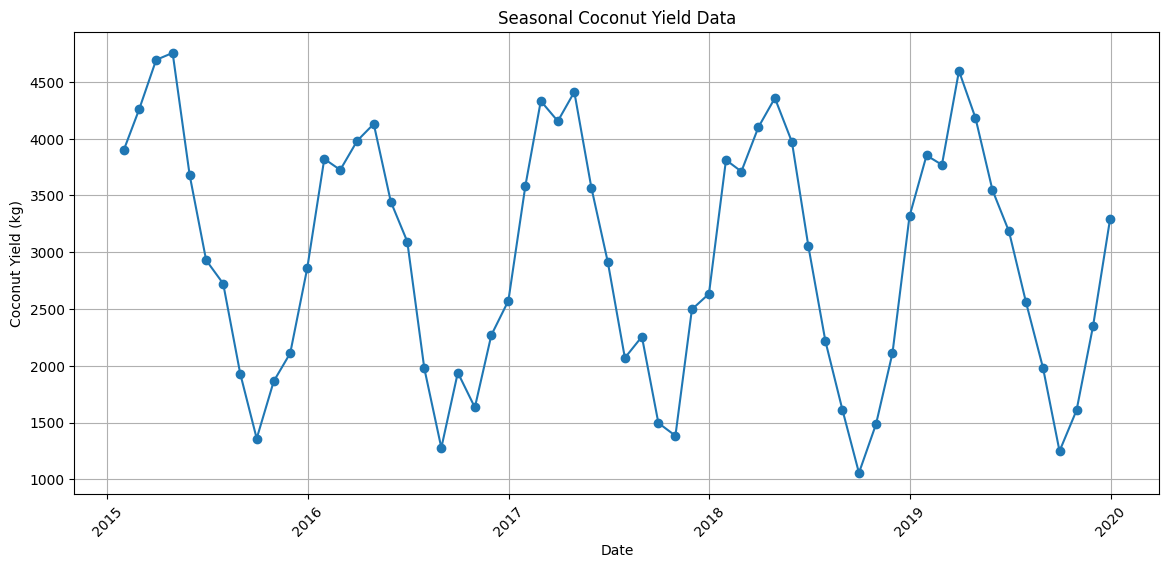

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Define parameters
years = 5
months = 12
date_range = pd.date_range(start='2015-01-01', periods=years * months, freq='M')

# Create seasonal yield data (e.g., sinusoidal pattern for seasonality)
seasonal_amplitude = 1500  # amplitude of seasonal effect
base_yield = 3000  # base yield

# Simulating seasonal effect
seasonal_effect = seasonal_amplitude * np.sin(2 * np.pi * date_range.month / 12) + base_yield

# Adding random noise
noise = np.random.normal(loc=0, scale=300, size=len(date_range))
yield_data = seasonal_effect + noise

# Create DataFrame
df_seasonal = pd.DataFrame({'Date': date_range, 'Coconut Yield (kg)': yield_data})
df_seasonal['Month'] = df_seasonal['Date'].dt.month
df_seasonal['Year'] = df_seasonal['Date'].dt.year



# Plotting the dataset
plt.figure(figsize=(14, 6))
plt.plot(df_seasonal['Date'], df_seasonal['Coconut Yield (kg)'], marker='o')
plt.title('Seasonal Coconut Yield Data')
plt.xlabel('Date')
plt.ylabel('Coconut Yield (kg)')
plt.grid()
plt.xticks(rotation=45)
plt.show()


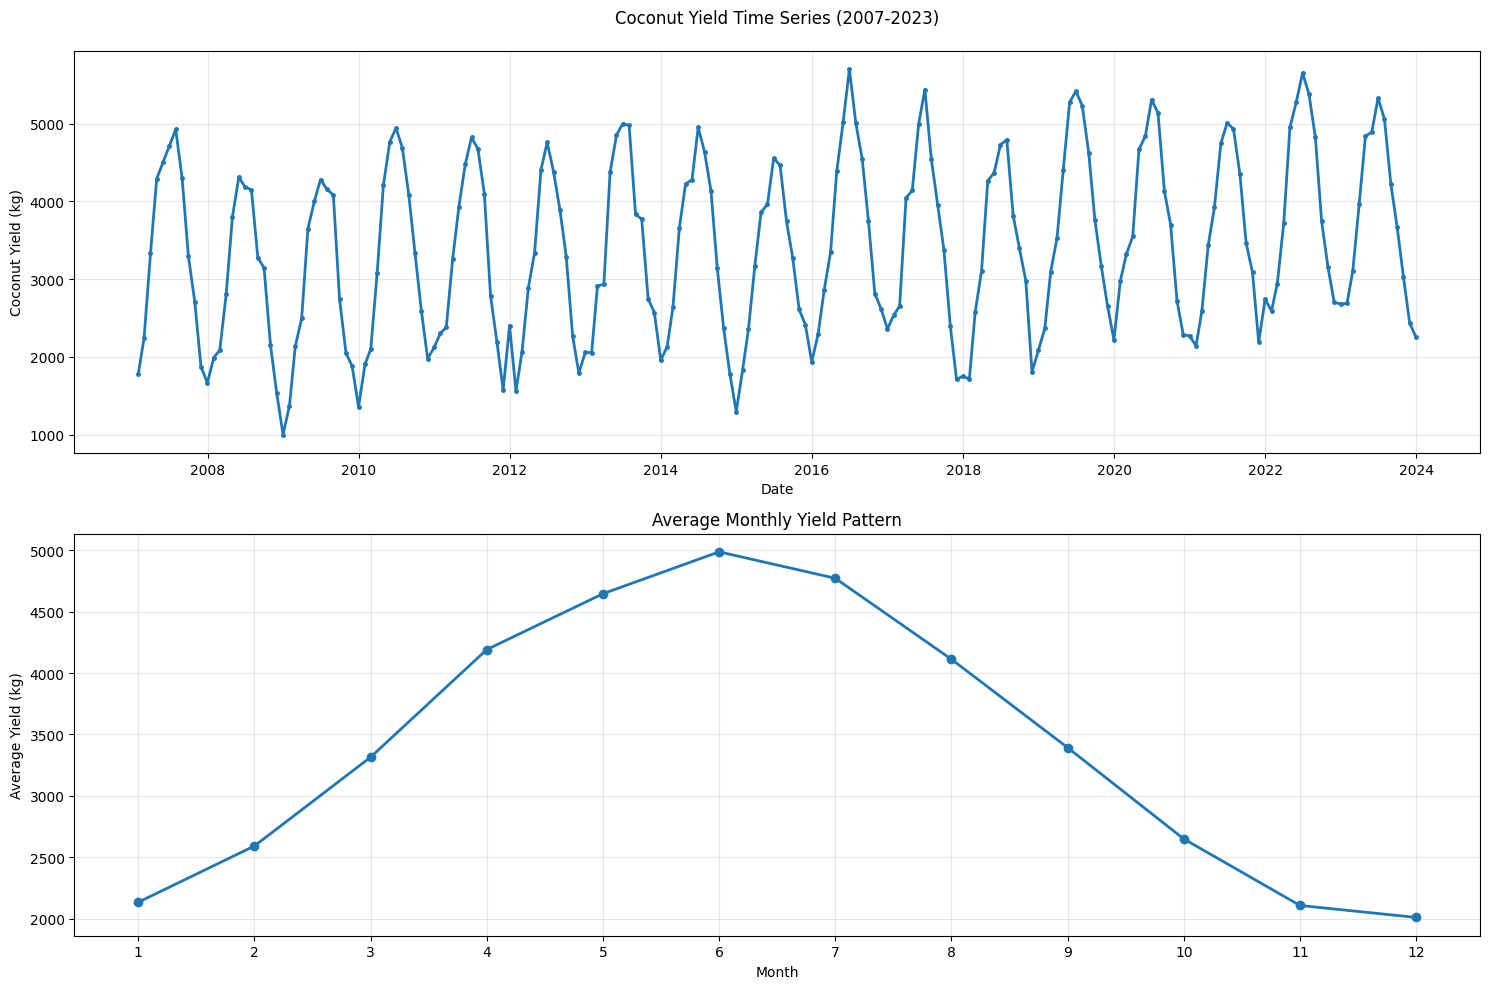

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Define parameters
years = 17  # approximately 200 months
months = 12
date_range = pd.date_range(start='2007-01-01', end='2023-12-31', freq='M')

# Create base seasonal pattern
def generate_yield_data(date_range):
    # Base parameters
    seasonal_amplitude = 1500
    base_yield = 3000
    trend_factor = 0.5  # Slight upward trend per year
    
    # Time components
    months = date_range.month
    years = (date_range.year - date_range.year.min())
    
    # Generate components
    # Seasonal pattern (varies by month)
    seasonal_effect = seasonal_amplitude * np.sin(2 * np.pi * (months - 3) / 12)
    
    # Long-term trend
    trend = years * trend_factor * 100
    
    # Add cyclical variation (3-year cycle)
    cyclical = 300 * np.sin(2 * np.pi * (years * 12 + months) / (3 * 12))
    
    # Random variations (higher in peak seasons)
    base_noise = np.random.normal(0, 200, len(date_range))
    seasonal_noise = np.random.normal(0, 100 * np.abs(np.sin(2 * np.pi * months / 12)), len(date_range))
    
    # Combine all components
    yield_data = (base_yield + 
                 seasonal_effect + 
                 trend + 
                 cyclical + 
                 base_noise + 
                 seasonal_noise)
    
    # Add some random shocks (unusual events)
    shock_mask = np.random.random(len(date_range)) < 0.05  # 5% chance of shock
    shocks = np.random.normal(0, 500, len(date_range)) * shock_mask
    
    yield_data += shocks
    
    # Ensure no negative yields and round to 3 decimals
    yield_data = np.maximum(yield_data, 1000)
    yield_data = np.round(yield_data, 3)
    
    return yield_data

# Generate yield data
yield_data = generate_yield_data(date_range)

# Create DataFrame
df_seasonal = pd.DataFrame({
    'Date': date_range,
    'Coconut Yield (kg)': yield_data
})

# Create visualizations
plt.figure(figsize=(15, 10))

# Main time series plot
plt.subplot(2, 1, 1)
plt.plot(df_seasonal['Date'], df_seasonal['Coconut Yield (kg)'], 
         linewidth=2, marker='.', markersize=5)
plt.title('Coconut Yield Time Series (2007-2023)', pad=20)
plt.xlabel('Date')
plt.ylabel('Coconut Yield (kg)')
plt.grid(True, alpha=0.3)

# Seasonal pattern plot
plt.subplot(2, 1, 2)
monthly_avg = df_seasonal.groupby(df_seasonal['Date'].dt.month)['Coconut Yield (kg)'].mean()
plt.plot(range(1, 13), monthly_avg, marker='o', linewidth=2)
plt.title('Average Monthly Yield Pattern')
plt.xlabel('Month')
plt.ylabel('Average Yield (kg)')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()


In [10]:
df_seasonal.to_csv('seasonal_coconut_yield_data_2.csv', index=False)

new data with additional column

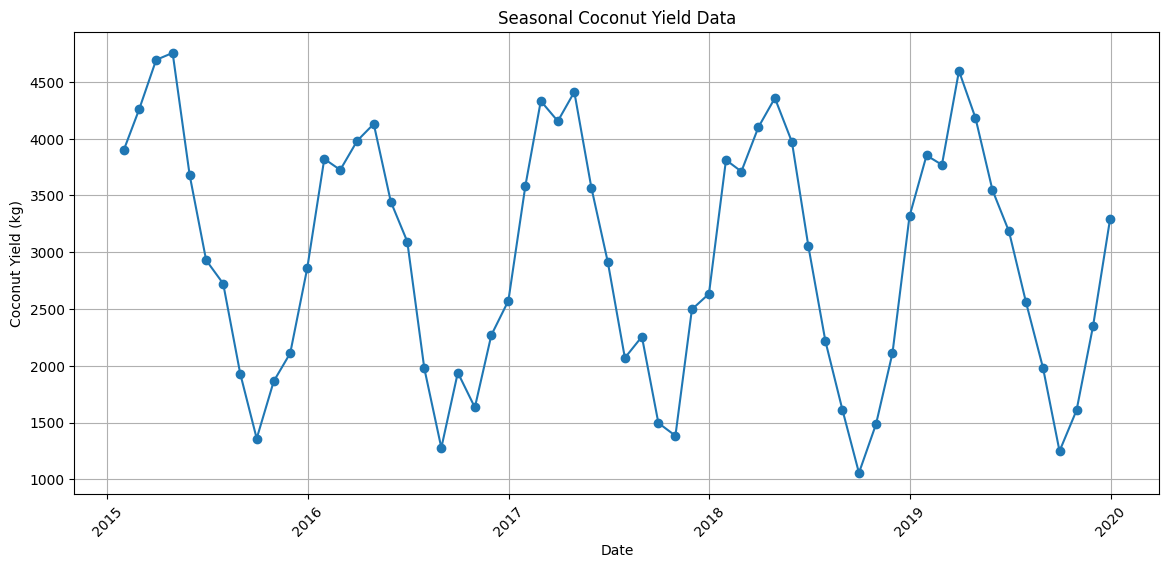

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Set a random seed for reproducibility
np.random.seed(42)

# Define parameters
years = 5
months = 12
num_records_per_status = 3000  # Number of records for each irrigation status
date_range = pd.date_range(start='2015-01-01', periods=years * months, freq='M')

# Create seasonal yield data (e.g., sinusoidal pattern for seasonality)
seasonal_amplitude = 1500  # amplitude of seasonal effect
base_yield = 3000  # base yield

# Simulating seasonal effect
seasonal_effect = seasonal_amplitude * np.sin(2 * np.pi * date_range.month / 12) + base_yield

# Adding random noise
noise = np.random.normal(loc=0, scale=300, size=len(date_range))
yield_data = seasonal_effect + noise

# Generate additional features for the dataset
data = []

# Function to generate soil moisture values
def generate_soil_moisture():
    return (
        np.random.uniform(15, 40),  # Soil moisture at 10 cm
        np.random.uniform(20, 50),  # Soil moisture at 20 cm
        np.random.uniform(25, 60)   # Soil moisture at 30 cm
    )

# Loop to create records
for i in range(len(date_range)):
    soil_moisture_10, soil_moisture_20, soil_moisture_30 = generate_soil_moisture()
    plant_age = np.random.randint(1, 10)  # Random plant age between 1 and 10 years
    temperature = np.random.uniform(25, 35)  # Random temperature between 25°C and 35°C
    humidity = np.random.uniform(60, 80)  # Random humidity between 60% and 80%
    rainfall = np.random.choice([0, np.random.uniform(0.1, 15)], p=[0.7, 0.3])  # Random rainfall with a 70/30 split
    rain_status = 1 if rainfall > 0 else 0  # 1 if it rained, 0 otherwise

    # Append the record
    data.append([
        date_range[i].date(),
        soil_moisture_10,
        soil_moisture_20,
        soil_moisture_30,
        plant_age,
        temperature,
        humidity,
        rainfall,
        rain_status,
        yield_data[i]
    ])

# Create DataFrame
columns = [
    'Date', 
    'Soil Moisture (10 cm) (%)', 
    'Soil Moisture (20 cm) (%)', 
    'Soil Moisture (30 cm) (%)', 
    'Plant Age (years)', 
    'Temperature (°C)', 
    'Humidity (%)', 
    'Rainfall (mm)', 
    'Rain Status (0/1)', 
    'Coconut Yield (kg)'
]
df_seasonal = pd.DataFrame(data, columns=columns)

# Plotting the coconut yield data
plt.figure(figsize=(14, 6))
plt.plot(df_seasonal['Date'], df_seasonal['Coconut Yield (kg)'], marker='o')
plt.title('Seasonal Coconut Yield Data')
plt.xlabel('Date')
plt.ylabel('Coconut Yield (kg)')
plt.grid()
plt.xticks(rotation=45)
plt.show()


In [8]:
df_seasonal.to_csv('seasonal_coconut_yield_data_3.csv', index=False)